# 2. [**Область видимости переменных. Замыкание**](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/courseware/315a623e358544698ceaf9d149a3392e/f124181cd91e4aca9e33aa7f40960a23/1?activate_block_id=block-v1%3ASkillFactory%2BDSPR-2.0%2B14JULY2021%2Btype%40vertical%2Bblock%401cef5938756d414790416cf016f35741)

При работе над крупными проектами зачастую приходится создавать функции, которые содержат внутри себя другие функции. Например, функция для входа в личный кабинет на сайте использует функцию проверки логина и пароля, прежде чем предоставить доступ. Получается, что проверка пароля вложена в процедуру входа на сайт.
**Примечание**. На самом деле организация такой вложенности — это лишь один из вариантов реализации функционала. Вы можете создать две данные функции независимо друг от друга.
Нередко в разных функциях используются одни и те же названия переменных. Иногда эти переменные должны обозначать один объект, а иногда — совершенно разные. Это не ошибка, а вполне распространённая практика.
Например, в нашей программе авторизации пользователя может содержаться несколько функций, в которых есть переменная с именем n. Причём в каждой из функций она означает различные вещи: в одной функции — количество символов в пароле, в другой — количество зарегистрированных пользователей.
Но возникает вопрос: как интерпретатор не путается в этих именах? Как он понимает, какую переменную необходимо использовать?
Это мы и узнаем в данном юните.
Также вы узнаете: 
*   что такое область видимости переменных;
*   как использовать переменные с различной областью видимости;
*   почему не стоит использовать названия встроенных в Python объектов в качестве имён переменных.

## ОБЛАСТЬ ВИДИМОСТИ ФУНКЦИЙ

Вначале разберёмся, как устроены функции, которые содержат внутри себя другие функции.
Нередко вложенные функции используются для некоторых промежуточных вычислений: например, внутри функции, которая выводит на экран график, содержится функция, которая вычисляет параметры этого графика (размер, соотношение сторон и прочее).
Создадим функцию `print_root()`, которая будет печатать корень степени `n` (по умолчанию `n = 2`, то есть вычисляется квадратный корень) из числа `value`. Внутри себя она будет содержать другую функцию `root()`, которая будет вычислять корень степени `n` из числа `value`. Напомним, корень степени `n` из числа — это число в степени `1/n`.

In [ ]:
# Зададим внешнюю функцию
def print_root(value, n=2):
    # Зададим внутреннюю функцию
    # Она будет являться вспомогательной
    def root(value, n=2):
        result = value ** (1/n)
        return result
    # Получим результат из внутренней функции
    res = root(value, n)
    # Печатаем результат и не возвращаем его
    print('Root of power', n, 'from', value, 'equals', res)

Вызовем функцию `print_root` с параметрами `value = 81`, `n = 4`, то есть вычислим корень четвёртой степени из числа `81`. Из школьного курса математики нам известно, что это будет `3`, так как число `3` в четвёртой степени даёт `81`.

In [ ]:
print_root(81, 4)
# Будет напечатано:
# Root of power 4 from 81 equals 3.0

Root of power 4 from 81 equals 3.0


Как видите, функция сработала без ошибок, а на экране появился результат извлечения корня из числа.

Что произошло в коде выше?

Попробуем обратиться непосредственно к функции `root`:

In [ ]:
print(root(81, 4))
# Возникнет ошибка:
# NameError: name 'root' is not defined

Эта ошибка переводится так: «Ошибка имени: имя 'root' не определено». Но в чём же проблема?


---

>
>Дело в том, что функция `print_root` скрывает, защищает (инкапсулирует) доступ ко внутренним функциям из основного скрипта, поэтому интерпретатор не может найти эту функцию, а функция `root` остаётся только для внутреннего использования.
>
> Более того, данное ограничение относится не только ко внутренней функции `root()`, но и ко всем переменным, объявленным внутри функции `print_root()`.


---
Например, если мы попробуем обратиться к значению переменной `res`, которая была объявлена внутри функции `print_root()`, мы также получим ошибку:



In [ ]:
print(res)
#Возникнет ошибка
#NameError: name 'res' is not defined



---


> Итак, сделаем небольшой промежуточный вывод.
> 
> В Python существует «право на владение объектом» — функцией/переменной. Если функция/переменная находится в теле некоторой функции, обратиться к ней можно не из каждой точки программы. Чтобы более детально разобраться в этом вопросе, нам нужно привести классификацию переменных и познакомиться с важным термином — разрешение переменных.


---



## РАЗРЕШЕНИЕ ПЕРЕМЕННЫХ

Начнём с примера рабочей задачи.

Мы занимаемся регистрацией данных о сотрудниках нашей компании в базе. Внесение в базу будем имитировать выводом информации на экран. Поля для ввода — имя и фамилия сотрудника. На экран должны быть выведены полное имя сотрудника (имя и фамилия) и название компании.

Создадим функцию `register_employee(`) с аргументами `name` и `surname` (имя и фамилия сотрудника). Функция ничего не возвращает — просто выводит на экран фразу `'Employee {} is registered with the company {}'`, где вместо `{}` подставляется полное имя сотрудника (фамилия и имя) и название компании. Название компании хранится в переменной `company_name`, которая объявлена в основной части программы.

Внутри функции `register_employee()` объявим другую функцию — `create_full_name()`. Она возвращает полное имя сотрудника — результат сложения (конкатенации) строк с именем и фамилией:

In [ ]:
#объявляем внешнюю функцию для регистрации сотрудников
def register_employee(name, surname):
    #объявляем функцию для промежуточных вычислений
    def create_full_name():
        #функция использует внешние переменные name и surname
        sep = ' ' #разделитель между именем и фамилией
        result = name + sep + surname #вычисляем полное имя
        return result
    full_name = create_full_name() #вызываем внутреннюю функцию
    #выводим результат на экран, используя внешнюю переменную company_name
    print('Employee {} is registered with the company {}'.format(full_name, company_name))
    
company_name = 'TheBlindMice' #название компании
register_employee('John','Doe') #вызов функции


#Будет выведено
#Employee John Doe is registered with the company TheBlindMice

Employee John Doe is registered with the company TheBlindMice


Отлично, наша функция работает! А значит, нам пора переходить к важной терминологии.


---

> Процесс поиска интерпретатором объекта, который скрывается за названием переменной, называется разрешением.
>
> Например, в функции `register_employee()` мы обращаемся к переменной `company_name`, однако данная переменная была объявлена за пределами функции. То, как интерпретатор понимает, что за переменной `company_name` скрывается строка `'TheBlindMice'`, и называется разрешением.

---

В Python существует четыре типа переменных в зависимости от их видимости. Их разрешение будет идти от пункта 1 до пункта 4. Для любого разработчика очень важно понимать различия между ними, чтобы не сделать множество ошибок в попытках использовать переменные, которые использовать нельзя.


1.   **Локальные переменные** (`local`) — это переменные, которые были объявлены в функции и используются непосредственно в ней. В разряд локальных переменных также входят аргументы функции.
>
   *   Аргументы функции `register_employee()`, name и surname, являются локальными переменными по отношению к этой функции.
   *   Функция `create_full_name()` является локальной для функции `register_employee()`. Попытка вызвать её из основной части программы приведёт к ошибке, которую мы уже видели раньше.
   *   Переменные `sep` и `result` являются локальными по отношению к функции create_full_name(). Они является невидимыми для функции `register_employee()` и для основной части программы.
   *   Переменная `full_name`, в которую заносится результат работы функции `create_full_name()`, является локальной переменной функции `register_employee()`.

2.   **Нелокальные переменные** (`nonlocal`) — это переменные, которые были объявлены во внешней функции относительно рассматриваемой функции.
   
   *   Переменные name и surname являются нелокальными по отношению к функции `create_full_name()`. Они объявлены во внешней функции и используются во внутренней.

3.   **Глобальные переменные** (`global`) — это переменные, которые были объявлены непосредственно в основном блоке программы (вне функций).

   *     Переменная `company_name` объявлена в основной части программы (вне функции) и является глобальной.
Обратите внимание, что она задана после объявления функции. Ошибки не возникает, потому что код выполняется построчно, а значит сначала создаётся переменная `company_name`, а затем она уже используется в вызове функции  `register_employee()`. Если бы мы поменяли вызов функции и объявление переменной местами, получили бы ошибку.

4.   **Встроенные переменные** (`built-in`) — это переменные и объекты, которые встроены в функционал Python изначально. Например, к ним относятся функции `print`, `len`, структуры данных `list`, `dict`, `tuple` и другие. В большинстве **IDE**, таких как PyCharm, VS Code и Jupyter, имена таких переменных подсвечиваются специальным цветом.

   *   Функция print() является встроенной функцией Python. К ней можно обращаться из любой части программы.

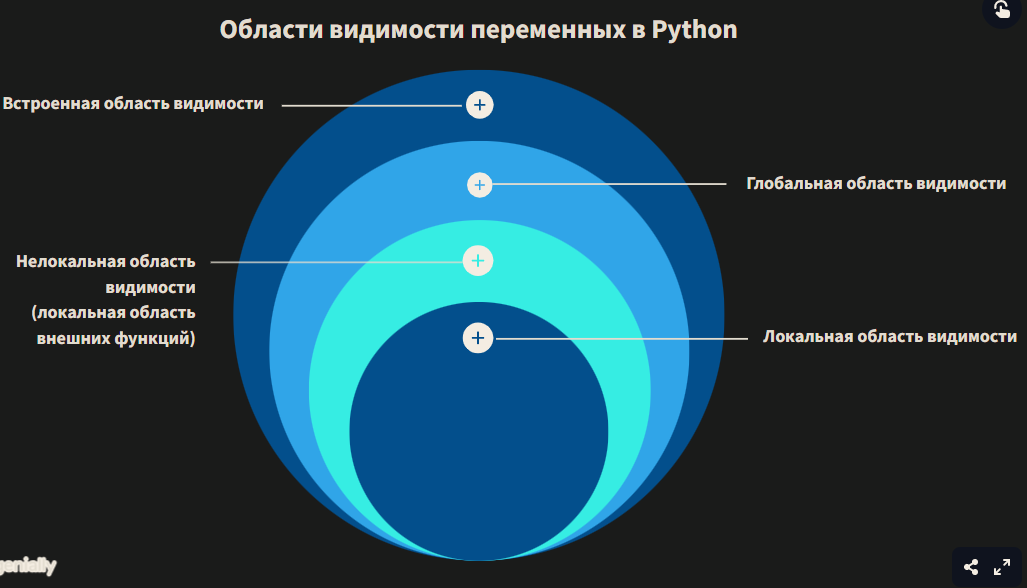


---

> Когда интерпретатор встречает в коде функции ссылку (переменную) на какой-то объект, он начинает искать его среди **локальных** переменных, затем переключается на **нелокальные**, потом на **глобальные** и, наконец, ищет переменную среди **встроенных** объектов. Если поиск оказался безрезультатным, возникает ошибка.

---
Давайте разберёмся, как работает разрешение (как интерпретатор находит значения переменных) в нашем примере:

1.   В вызове функции `create_full_name()` мы используем переменные `name` и `surname`. Интерпретатор сначала пытается найти их среди локальных переменных самой функции, но попытка оказывается безуспешной. Тогда проводится проверка на совпадение имён среди нелокальных переменных, и она оказывается успешной — переменные объявлены во внешней функции.

2.   В вызове функции `register_employee()` мы используем переменную `company_name`. Интерпретатор сначала (безуспешно) ищет её среди локальных переменных. Поиск среди нелокальных переменных не имеет смысла, так как функция является внешней. Тогда переходим к глобальным переменным. И — о, чудо! Переменная `company_name` была объявлена до вызова функции, а значит мы смогли найти её в глобальной области видимости.

3.   В той же функции `register_employee()` мы используем функцию `print()`. Но интерпретатор не знает, что эта функция — встроенная. Значит, проводится поиск среди локальных имен, пропускается нелокальный поиск, потом ведётся поиск среди глобальных переменных, и только на слое встроенных имён поиск оказывается успешным.

На схеме ниже представлено графическое представление нашей простенькой программы:

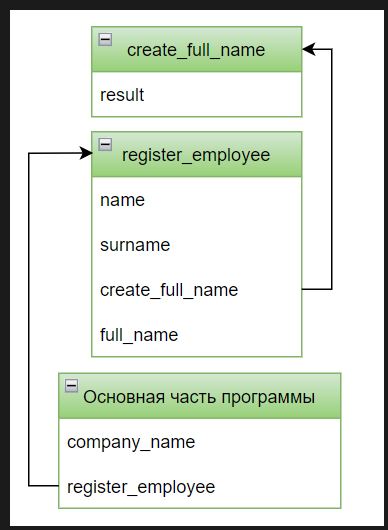

---

> Каждый блок образует свой «этаж», на котором «живут» свои переменные и объявленные на нём функции. Наш «домик» не простой: жители верхних этажей никогда не ходят в гости к жителям ниже, а жители снизу ничего не знают о существовании жителей сверху.
>
> Таким образом, действует правило: на свой этаж можно пригласить только жителя со своего или нижних этажей, попытка позвать в гости соседа сверху приведёт к ошибке.

---

Лучший способ учиться — учиться на ошибках. Рассмотрим различия между типами переменных, некорректно обращаясь к ним.

Например, что будет, если мы попробуем обратиться к переменной result во внешней функции?

In [ ]:
def register_employee(name, surname):
    #name и surname — локальные переменные register_employee
    def create_full_name():
        #sep — локальная переменная для create_full_name
        sep = ' ' 
        #name, surname — нелокальные переменные для create_full_name
        #result — локальная переменная create_full_name
        result = name + sep + surname
        return result
    #full_name — локальная переменная register_employee
    full_name = create_full_name()
    #пытаемся обратиться к result из основной части программы
    print(result)
    print('Employee {} is registered with the company {}'.format(full_name, company_name))

#company_name — глобальная переменная       
company_name = 'TheBlindMice'
#вызов функции
register_employee('Jone','Doe')
#Возникнет ошибка 
#NameError: name 'result' is not defined

Мы получим ошибку, которая говорит о том, что переменная `result` не объявлена в функции `register_employee()`. Так произошло потому, что функция `register_employee()` ничего не знает о переменной `result`, так как она является локальной для функции `create_full_name()`.  На языке нашей схемы: мы попытались пригласить на второй этаж жителя с третьего этажа, что противоречит правилам.

Такую же ошибку мы получим, если попробуем обратиться к переменной `full_name` из основной части программы:

In [ ]:
def register_employee(name, surname):
    #name и surname — локальные переменные register_employee
    def create_full_name():
        #sep — локальная переменная для create_full_name
        sep = ' ' 
        #name, surname — нелокальные переменные для create_full_name
        #result — локальная переменная create_full_name
        result = name + sep + surname
        return result
    #full_name — локальная переменная register_employee
    full_name = create_full_name()
    print('Employee {} is registered with the company {}'.format(full_name, company_name))

#company_name — глобальная переменная    
company_name = 'TheBlindMice' 
#вызов функции
register_employee('Jone','Doe') 
#пытаемся обратиться к full_name из основной части программы
print(full_name)
#Возникнет ошибка 
#NameError: name 'full_name' is not defined

Снова получаем ошибку, так как `full_name` — локальная переменная для функции `register_employee()`, и основная часть программы о ней ничего не знает. На языке нашей схемы: мы пытаемся пригласить на первый этаж жителя со второго этажа, что является невозможным.

---

> Есть еще одно **очень важное ограничение**: если в коде функции происходит переопределение глобальной или нелокальной переменной, то необходимо показать, что та или иная переменная является глобальной или нелокальной.
>
> Например, если внутри тела функции происходит увеличение/уменьшение глобальной переменной с помощью операторов +=/-=, то такое изменение значение глобальной переменной вызовет ошибку.
>
> Если руководствоваться аналогией с нашей многоэтажкой: приглашая жителя снизу, мы не можем переодеть его, явно не спросив об этом.

---

Рассмотрим это ограничение на примере.

Пусть у нас есть переменная `global_counter`, в которой мы храним количество, например, количество товаров на складе. Когда товар поступает на склад, мы увеличиваем его количество на `1`.

Для этого напишем функцию `add_one()`, которая увеличивает значение глобальной переменной `global_counter` на `1`, вызовем её и попробуем посмотреть на значение переменной.

 Напишем функцию, которая увеличивает значение глобальной переменной на `1`:

In [ ]:
# Создадим глобальную переменную
# и приравняем её нулю
global_counter = 0
 
# Создадим функцию, которая прибавляет 1
# к переменной global_counter
def add_one():
    global_counter += 1
 
# Запустим функцию add_one
add_one()
# Напечатаем значение переменной global_counter
print(global_counter)
 
# Возникнет ошибка
# UnboundLocalError: local variable 'global_counter' referenced before assignment

Перевод ошибки: *«К локальной переменной 'global_counter' обратились до объявления переменной в коде»*. Это означает, что интерпретатор считает эту переменную локальной, хотя в основной части программы есть одноимённая переменная.

Но в чём проблема? В предыдущем примере мы спокойно использовали значение глобальной переменной company_name в теле функции, а сейчас возникает ошибка.

> Ответ следующий: это специальный механизм защиты глобальных переменных в Python. Когда мы пытаемся перезаписать (изменить) значение глобальной переменной, она является для нас недоступной. 

   Как именно возникает такая ошибка?
Присмотримся повнимательнее к операции присваивания. Слева от оператора присваивания (`=`) стоит переменная `global_counter`. Когда выполняется операция присваивания, в памяти выделяется место для новой локальной переменной `global_counter`. Однако её значение ещё не было задано — было выделено только место для хранения, но само содержимое «не привезли».

Эта же переменная стоит и справа от оператора присваивания(`=`): `global_counter = global_counter + 1`. Когда мы обращаемся к переменной `global_counter` справа, то `global_counter` считается в этот момент уже локальной, а не глобальной (и, напомним, её значение ещё не было задано). Возникает противоречие: мы пытаемся обратиться к переменной, значение которой ещё не было определено. Отсюда и возникает ошибка *UnboundLocalError*.

Зачем нужна такая защита?

Представьте, что вы — *Data Scientist*, который отвечает за написание структуры программы, то есть вы задаёте все её возможные настройки. Вы решаете хранить настройки в глобальных переменных: размеры графиков, параметры модели, количество итераций, необходимое для запуска какого-то функционала.

Вы всё написали и отдали свою работу своим начинающим коллегам, которые будут прописывать конкретные функции, например построение графиков, обучение модели и прочее.

Предположим, что механизма защиты глобальных переменных нет.

Нескольким из ваших коллег не нравятся ваши исходные настройки, и они решают их изменить в своих функциях, а затем благополучно забывают об этом. Остальные коллеги ориентируются на исходные настройки и пишут код под них.

> Теперь представьте, что произойдёт, когда вы соберёте весь код воедино! Сплошная головная боль: каждая функция работает под различные настройки, из-за чего программа либо выдаёт ошибку, либо работает некорректно.

При этом без опыта работы с подобными ошибками вы не сразу поймёте, в чём причина, вы будете долго и упорно отлаживать программу на тысячи строк кода, на что у вас уйдут часы и часы работы. И всё из-за изменения маленькой глобальной переменной!

Ситуация, конечно же, утрирована, но она показывает необходимость механизма защиты глобальных и нелокальных переменных.

> **Важное замечание**: стандарты разработки на Python не рекомендуют изменять в функциях глобальные переменные, однако такая возможность предусмотрена. Для этого необходимо добавить оператор global внутри функции перед той переменной, которую вы хотите изменить глобально.

В данном случае, чтобы изменить переменную на глобальном уровне, нам необходимо добавить строку `global global_counter`:

In [ ]:
global_counter = 0
 
def add_one():
    # Обозначим, что переменная global_counter
    # является глобальной
    global global_counter
    global_counter += 1
 
add_one()
print(global_counter)
 
# Будет напечатано:
# 1

Теперь функция сработала без ошибок, а переменная `global_counter` увеличилась на `1` в глобальном смысле.

Аналогичного поведения следует ожидать от вложенных функций и нелокальных переменных.

Например, создадим функцию `inner_function()`, которая использует переменную `enclosing_counter`, созданную во внешней функции `outer_function()`. Она также должна увеличить значение этой переменной на `1` и сразу напечатать её значение. Всё, как в прошлой задаче, но теперь переменная является нелокальной.

In [ ]:
# Внешняя функция
def outer_function():
    # Создадим переменную, относящуюся к внешней функции
    enclosing_counter = 0
    # Внутренняя функция
    def inner_function():
        # Прибавим 1 к enclosing_counter
        enclosing_counter += 1
        # Напечатаем значение enclosing_counter
        print(enclosing_counter)
    # Запустим внутреннюю функцию из внешней
    inner_function()
 
# Запустим внешнюю функцию
outer_function()
 
# Возникнет ошибка:
# UnboundLocalError: local variable 'enclosing_counter' referenced before assignment

Как и ожидалось, мы получили ошибку. Причём ошибка того же характера: интерпретатор полагает, что `enclosing_counter` — это локальная переменная, которая ещё не была объявлена.

In [ ]:
def outer_function():
    enclosing_counter = 0
    def inner_function():
        # С помощью оператора nonlocal покажем,
        # что переменная enclosing_counter находится
        # во внешней функции
        nonlocal enclosing_counter
        enclosing_counter += 1
        print(enclosing_counter)
    inner_function()
 
outer_function()
 
# Будет напечатано:
# 1

Теперь ошибка не возникает, а поведение функции оказывается совершенно предсказуемым.

---

> У операции, которую мы только что совершили, есть своё название. В данном случае функция `inner_function` является функцией-замыканием — она использует в своём коде ссылки на переменные, которые были объявлены во внешней функции, но не в основном коде программы.

---

Итак, мы рассмотрели, как в функциях изменять локальные, нелокальные и глобальные переменные, и дали определение замыканию.

Возможно ли изменять встроенные объекты? Например, можно ли присваивать значение переменной с названием `len`, хотя `len` изначально используется в Python для подсчёта числа элементов в структуре данных?

Да, возможно. Однако это **крайне нежелательно**, поскольку теряется доступ к возможностям исходного объекта или функции.

Давайте рассмотрим пример. У нас есть некоторый список `my_list`, и мы хотим посчитать количество элементов в нём, воспользовавшись встроенной функцией `len()`. По своей невнимательности мы занесли вычисленный результат в переменную с именем `len`:

In [ ]:
my_list = [1,4,5,7]
# Запишем в переменную с названием
# len длину списка my_list,
# полученную с помощью встроенной функции len
len = len(my_list)
print(len)
# Будет напечатано:
# 4

Только что мы сохранили в переменную с названием `len` число `4`. Эта операция сработала без ошибок. Попробуем теперь посчитать длину ещё одного списка в том же скрипте уже после того, как предыдущий код был выполнен:

In [ ]:
# Повтор предыдущего кода:
my_list = [1,4,5,7]
# Запишем в переменную с названием
# len длину списка my_list,
# полученную с помощью встроенной функции len
len = len(my_list)
print(len)
# Будет напечатано:
# 4
 
# Попробуем снова воспользоваться функцией len:
# Создадим ещё один список
new_list = ['Ivan', 'Sergej', 'Maria']
# Также узнаем его длину с помощью функции len
length = len(new_list)
print(length)
# Возникнет ошибка:
# TypeError: 'int' object is not callable

Перевод ошибки: *«Ошибка типов: объект типа 'int (целое число)' нельзя вызвать»*. Эта ошибка связана с тем, что после запуска первого фрагмента кода в переменной `len` оказалось число `4` (то есть объекта типа `int`). В итоге за именем `len` в программе теперь скрывается число, а не встроенная в Python функция для вычисления длины списка. Из-за этого и возникла описанная ошибка во втором фрагменте кода. Будьте внимательны при написании своих программ.